# Hands-on Image Processing with Python

## Chapter 6: Mophological Image Processing

**Author: Sandipan Dey**

### Erosion

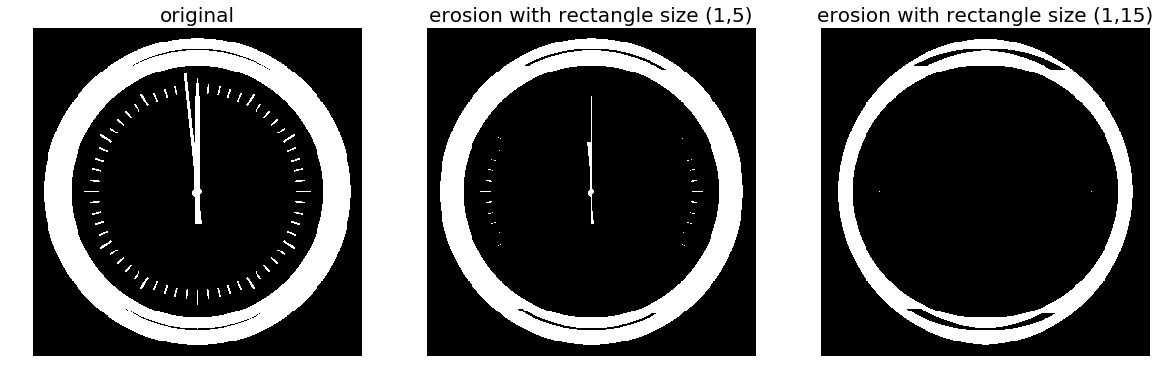

In [1]:
%matplotlib inline
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pylab as pylab
from skimage.morphology import binary_erosion, rectangle

def plot_image(image, title=''):
    pylab.title(title, size=20), pylab.imshow(image)
    pylab.axis('off') # comment this line if you want axis ticks
    

im = rgb2gray(imread('../images/clock2.jpg'))
im[im <= 0.5] = 0 # create binary image with fixed threshold 0.5
im[im > 0.5] = 1
pylab.gray()
pylab.figure(figsize=(20,10))
pylab.subplot(1,3,1), plot_image(im, 'original')
im1 = binary_erosion(im, rectangle(1,5))
pylab.subplot(1,3,2), plot_image(im1, 'erosion with rectangle size (1,5)')
im1 = binary_erosion(im, rectangle(1,15))
pylab.subplot(1,3,3), plot_image(im1, 'erosion with rectangle size (1,15)')
pylab.show()

### Dilation

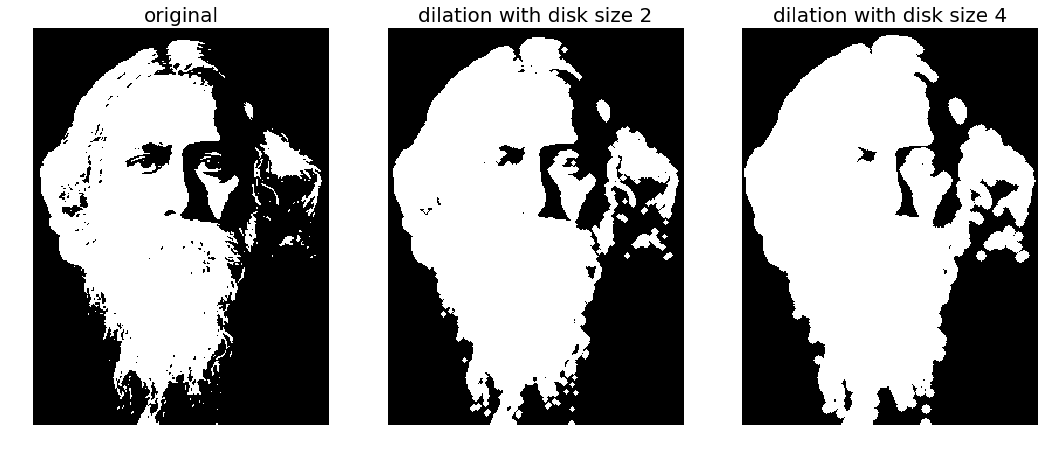

In [2]:
from skimage.morphology import binary_dilation, disk
from skimage import img_as_float
im = img_as_float(imread('../images/tagore.png'))
im = 1 - im[...,3]
im[im <= 0.5] = 0
im[im > 0.5] = 1
pylab.gray()
pylab.figure(figsize=(18,9))
pylab.subplot(131)
pylab.imshow(im)
pylab.title('original', size=20)
pylab.axis('off')
for d in range(1,3):
    pylab.subplot(1,3,d+1)
    im1 = binary_dilation(im, disk(2*d))
    pylab.imshow(im1)
    pylab.title('dilation with disk size ' + str(2*d), size=20)
    pylab.axis('off')
pylab.show()    

### Opening and closing

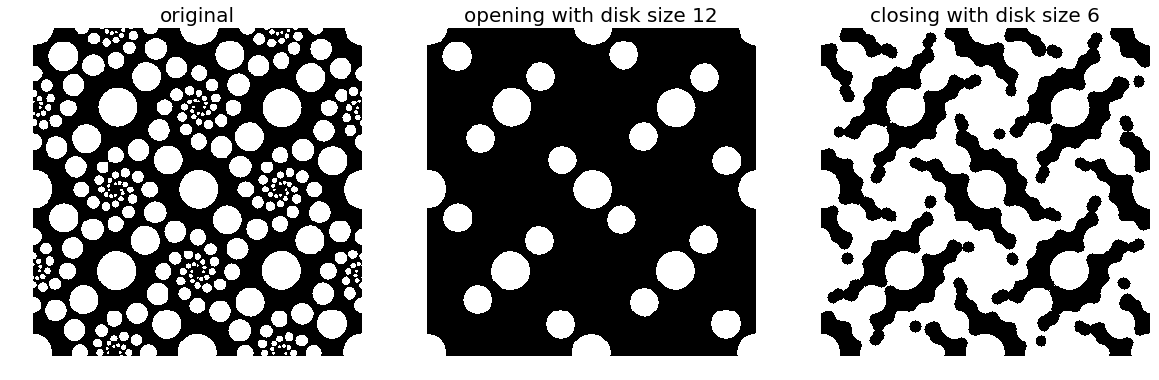

In [3]:
from skimage.morphology import binary_opening, binary_closing, binary_erosion, binary_dilation, disk
im = rgb2gray(imread('../images/circles.jpg'))
im[im <= 0.5] = 0
im[im > 0.5] = 1
pylab.gray()
pylab.figure(figsize=(20,10))
pylab.subplot(1,3,1), plot_image(im, 'original')
im1 = binary_opening(im, disk(12))
pylab.subplot(1,3,2), plot_image(im1, 'opening with disk size ' + str(12))
im1 = binary_closing(im, disk(6))
pylab.subplot(1,3,3), plot_image(im1, 'closing with disk size ' + str(6))
pylab.show()

### Skeletonizing

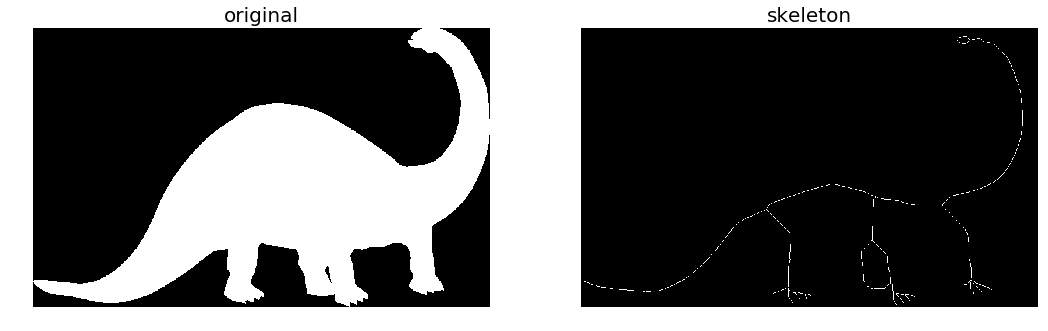

In [4]:
def plot_images_horizontally(original, filtered, filter_name, sz=(18,7)):
    pylab.gray()
    pylab.figure(figsize = sz)
    pylab.subplot(1,2,1), plot_image(original, 'original')
    pylab.subplot(1,2,2), plot_image(filtered, filter_name)
    pylab.show()

from skimage.morphology import skeletonize
im = img_as_float(imread('../images/dynasaur.png')[...,3])
threshold = 0.5
im[im <= threshold] = 0
im[im > threshold] = 1
skeleton = skeletonize(im)
plot_images_horizontally(im, skeleton, 'skeleton',sz=(18,9))

### Computing the convex hull

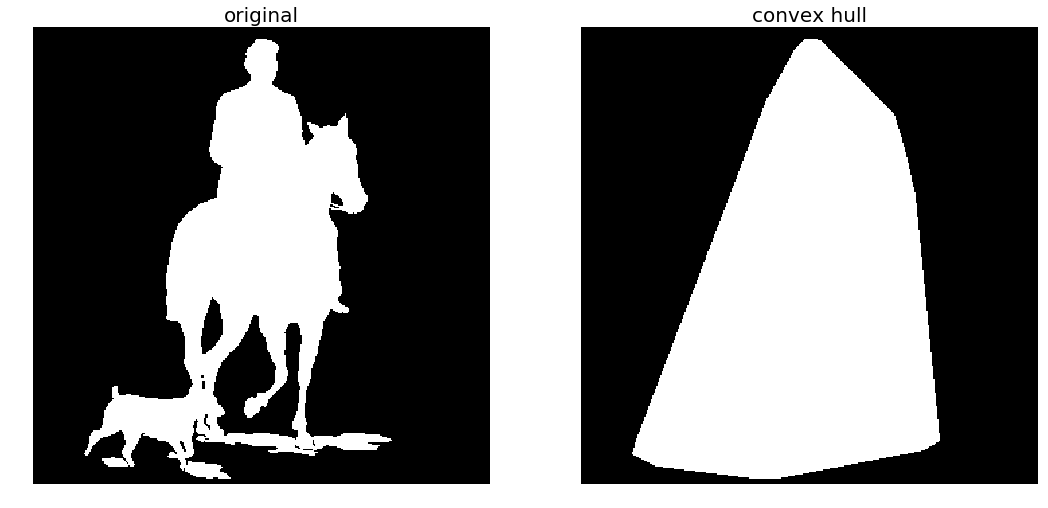

In [5]:
from skimage.morphology import convex_hull_image
im = rgb2gray(imread('../images/horse-dog.jpg'))
threshold = 0.5
im[im < threshold] = 0 # convert to binary image
im[im >= threshold] = 1
chull = convex_hull_image(im)
plot_images_horizontally(im, chull, 'convex hull', sz=(18,9))

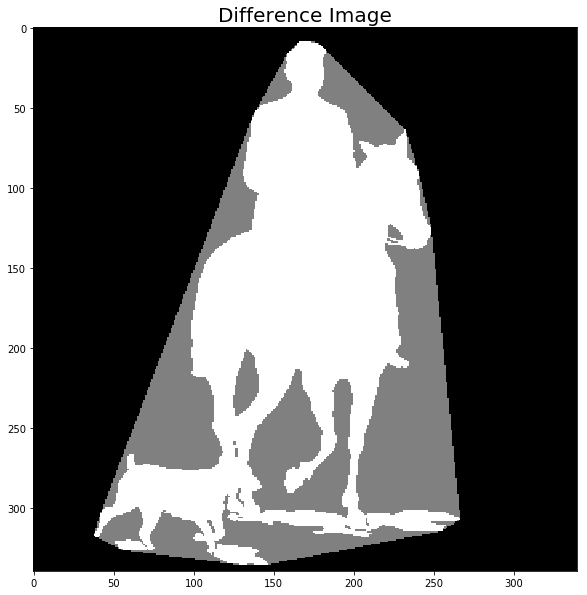

In [6]:
im = im.astype(np.bool)
chull_diff = img_as_float(chull.copy())
chull_diff[im] = 2
pylab.figure(figsize=(20,10))
pylab.imshow(chull_diff, cmap=pylab.cm.gray, interpolation='nearest')
pylab.title('Difference Image', size=20)
pylab.show()

### Removing small objects

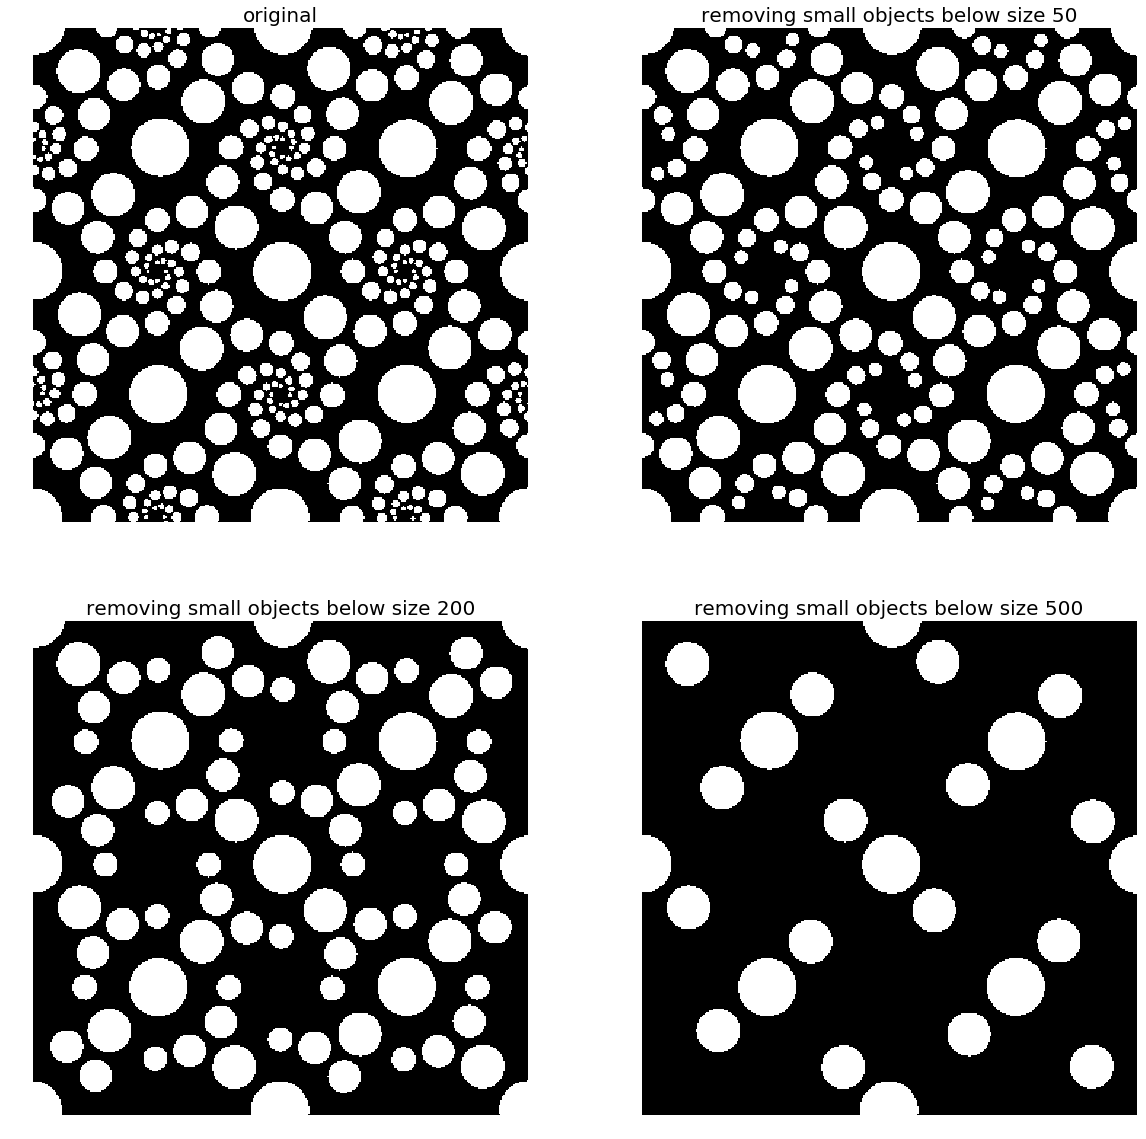

In [7]:
from skimage.morphology import remove_small_objects
im = rgb2gray(imread('../images/circles.jpg'))
im[im > 0.5] = 1 # create binary image by thresholding with fixed threshold
0.5
im[im <= 0.5] = 0
im = im.astype(np.bool)
pylab.figure(figsize=(20,20))
pylab.subplot(2,2,1), plot_image(im, 'original')
i = 2
for osz in [50, 200, 500]:
    im1 = remove_small_objects(im, osz, connectivity=1)
    pylab.subplot(2,2,i), plot_image(im1, 'removing small objects below size ' + str(osz))
    i += 1
pylab.show()

### White and black top-hats

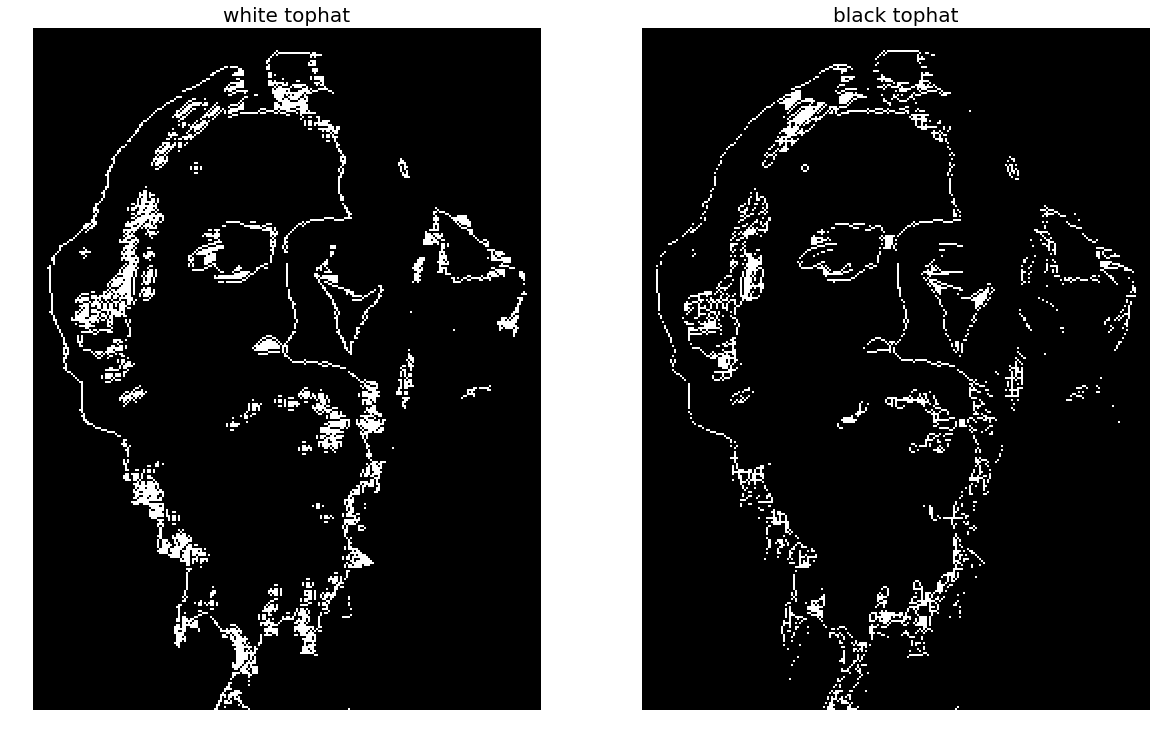

In [8]:
from skimage.morphology import white_tophat, black_tophat, square
im = imread('../images/tagore.png')[...,3]
im[im <= 0.5] = 0
im[im > 0.5] = 1
im1 = white_tophat(im, square(5))
im2 = black_tophat(im, square(5))
pylab.figure(figsize=(20,15))
pylab.subplot(1,2,1), plot_image(im1, 'white tophat')
pylab.subplot(1,2,2), plot_image(im2, 'black tophat')
pylab.show()

### Extracting the boundary

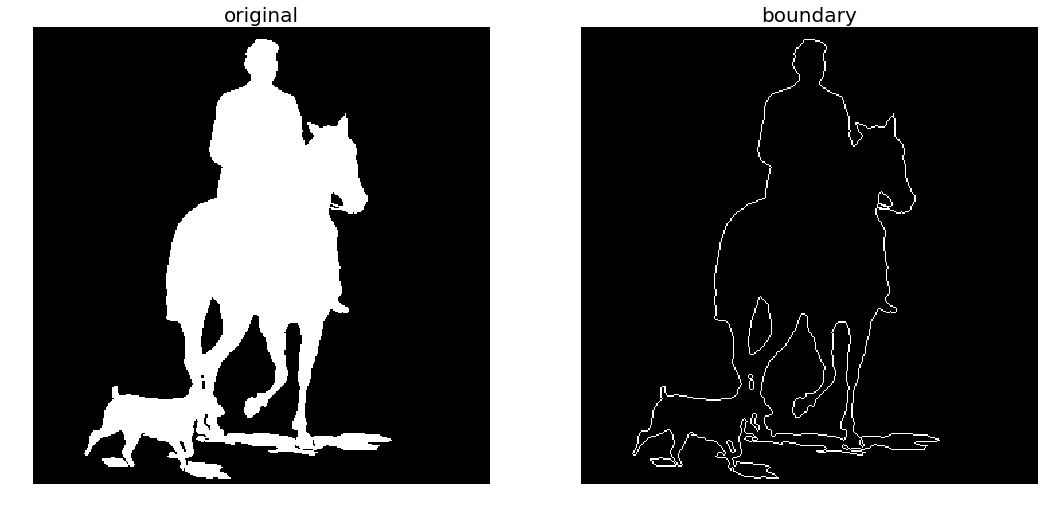

In [9]:
from skimage.morphology import binary_erosion
im = rgb2gray(imread('../images/horse-dog.jpg'))
threshold = 0.5
im[im < threshold] = 0
im[im >= threshold] = 1
boundary = im - binary_erosion(im)
plot_images_horizontally(im, boundary, 'boundary',sz=(18,9))

### Fingerprint cleaning with opening and closing

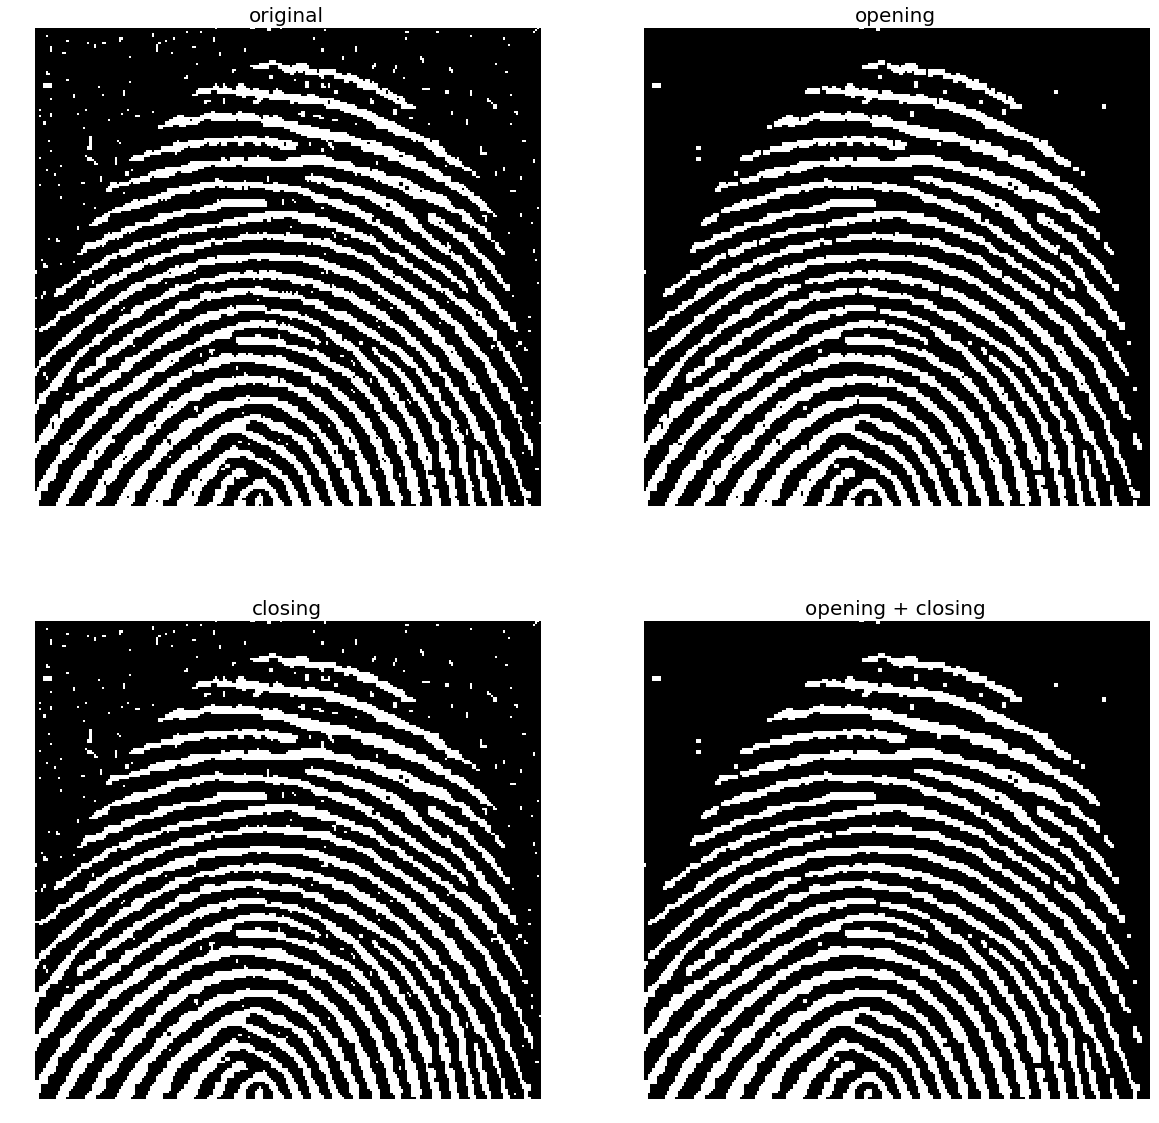

In [10]:
im = rgb2gray(imread('../images/fingerprint.jpg'))
im[im <= 0.5] = 0 # binarize
im[im > 0.5] = 1
im_o = binary_opening(im, square(2))
im_c = binary_closing(im, square(2))
im_oc = binary_closing(binary_opening(im, square(2)), square(2))
pylab.figure(figsize=(20,20))
pylab.subplot(221), plot_image(im, 'original')
pylab.subplot(222), plot_image(im_o, 'opening')
pylab.subplot(223), plot_image(im_c, 'closing')
pylab.subplot(224), plot_image(im_oc, 'opening + closing')
pylab.show()

### Grayscale operations

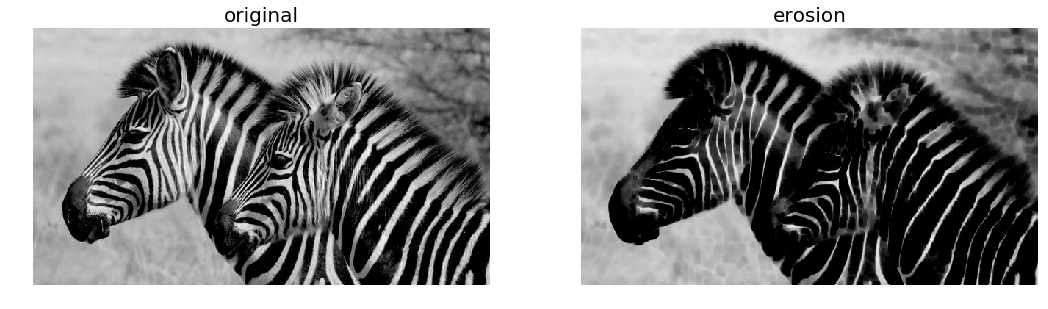

In [11]:
from skimage.morphology import dilation, erosion, closing, opening, square
im = imread('../images/zebras.jpg')
im = rgb2gray(im)
struct_elem = square(5)
eroded = erosion(im, struct_elem)
plot_images_horizontally(im, eroded, 'erosion')

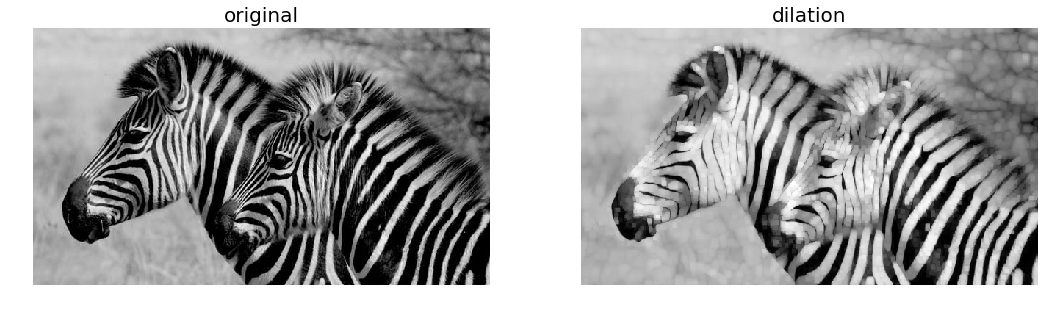

In [12]:
dilated = dilation(im, struct_elem)
plot_images_horizontally(im, dilated, 'dilation')

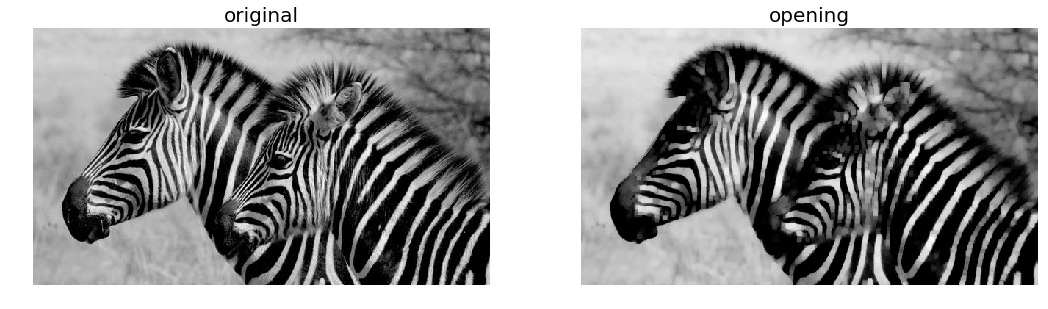

In [13]:
opened = opening(im, struct_elem)
plot_images_horizontally(im, opened, 'opening')

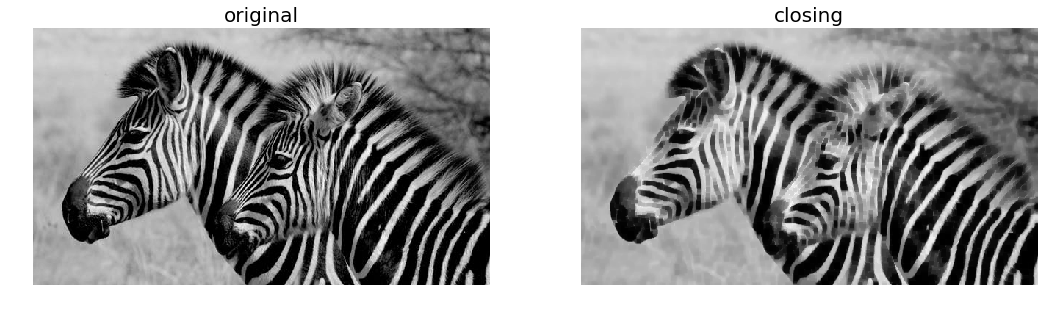

In [14]:
closed = closing(im, struct_elem)
plot_images_horizontally(im, closed, 'closing')

### Morphological contrast enhancement

/usr/local/lib/python3.5/dist-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.5/dist-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


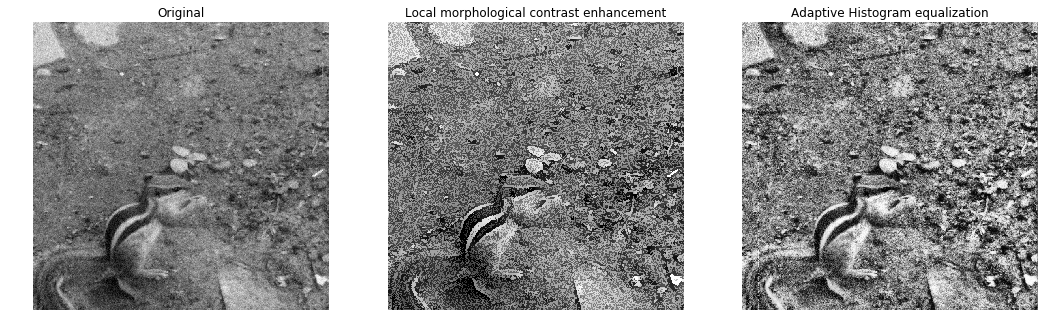

In [15]:
from skimage.filters.rank import enhance_contrast
from skimage import exposure
def plot_gray_image(ax, image, title):
    ax.imshow(image, cmap=pylab.cm.gray),
    ax.set_title(title), ax.axis('off')
    ax.set_adjustable('box-forced')
    
image = rgb2gray(imread('../images/squirrel.jpg'))
sigma = 0.05
noisy_image = np.clip(image + sigma * np.random.standard_normal(image.shape), 0, 1)
enhanced_image = enhance_contrast(noisy_image, disk(5))
equalized_image = exposure.equalize_adapthist(noisy_image)

fig, axes = pylab.subplots(1, 3, figsize=[18, 7], sharex='row',sharey='row')
axes1, axes2, axes3 = axes.ravel()
plot_gray_image(axes1, noisy_image, 'Original')
plot_gray_image(axes2, enhanced_image, 'Local morphological contrast enhancement')
plot_gray_image(axes3, equalized_image, 'Adaptive Histogram equalization')

### Noise removal with the median filter

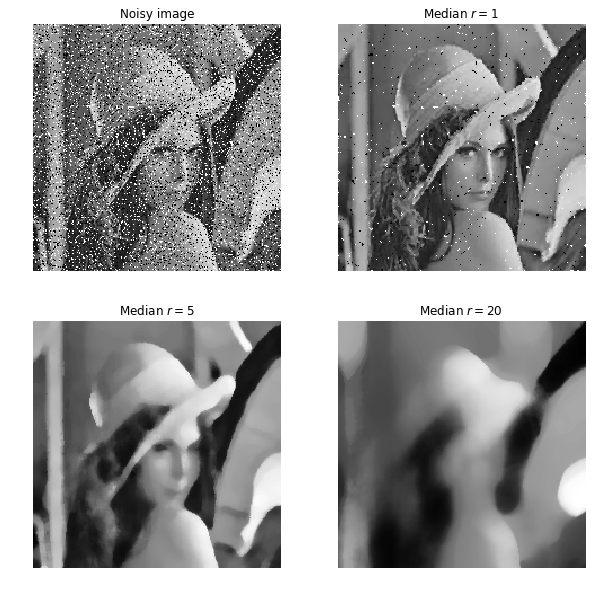

In [16]:
from skimage.filters.rank import median
from skimage.morphology import disk
noisy_image = (rgb2gray(imread('../images/lena.jpg'))*255).astype(np.uint8)
noise = np.random.random(noisy_image.shape)
noisy_image[noise > 0.9] = 255
noisy_image[noise < 0.1] = 0
fig, axes = pylab.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
axes1, axes2, axes3, axes4 = axes.ravel()
plot_gray_image(axes1, noisy_image, 'Noisy image')
plot_gray_image(axes2, median(noisy_image, disk(1)), 'Median $r=1$')
plot_gray_image(axes3, median(noisy_image, disk(5)), 'Median $r=5$')
plot_gray_image(axes4, median(noisy_image, disk(20)), 'Median $r=20$')

### Computing the local entropy

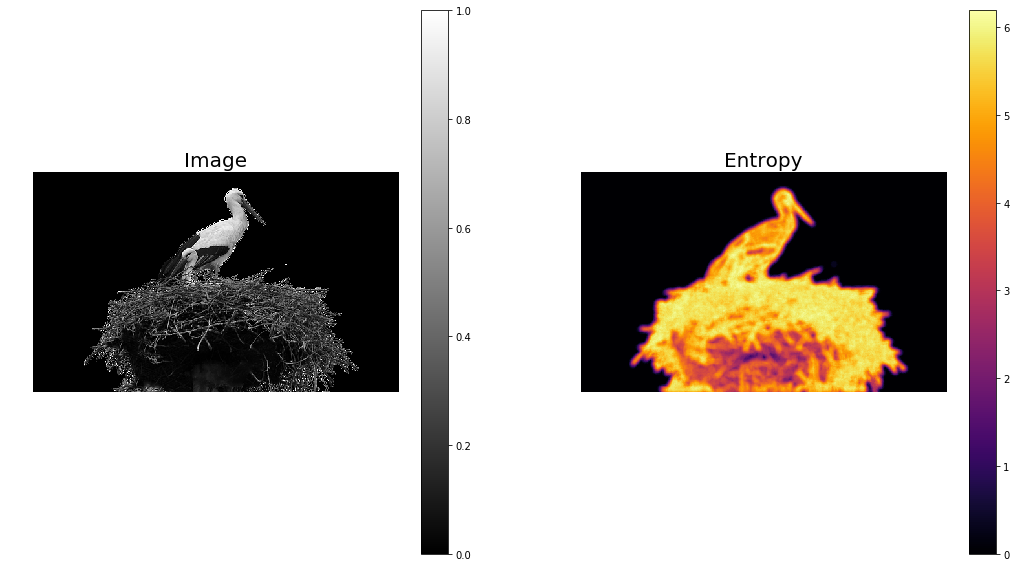

In [17]:
from skimage.morphology import disk
from skimage.filters.rank import entropy
image = rgb2gray(imread('../images/birds.png'))
fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(18, 10), sharex=True, sharey=True)
fig.colorbar(axes1.imshow(image, cmap=pylab.cm.gray), ax=axes1)
axes1.axis('off'), axes1.set_title('Image', size=20), axes1.set_adjustable('box-forced')
fig.colorbar(axes2.imshow(entropy(image, disk(5)), cmap=pylab.cm.inferno), ax=axes2)
axes2.axis('off'), axes2.set_title('Entropy', size=20), axes2.set_adjustable('box-forced')
pylab.show()

### Filling holes in binary objects

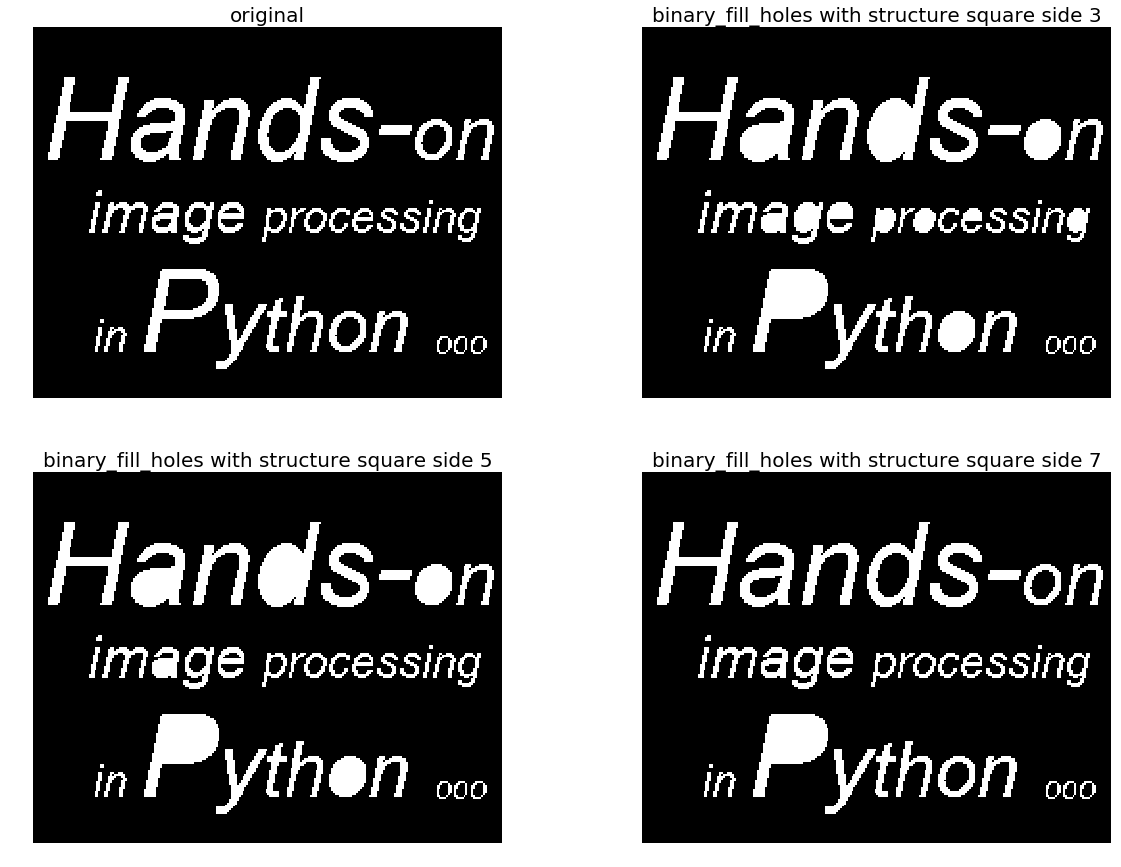

In [18]:
from scipy.ndimage.morphology import binary_fill_holes
im = rgb2gray(imread('../images/text1.png'))
im[im <= 0.5] = 0
im[im > 0.5] = 1
pylab.figure(figsize=(20,15))
pylab.subplot(221), pylab.imshow(im), pylab.title('original', size=20),pylab.axis('off')
i = 2
for n in [3,5,7]:
    pylab.subplot(2, 2, i)
    im1 = binary_fill_holes(im, structure=np.ones((n,n)))
    pylab.imshow(im1), pylab.title('binary_fill_holes with structure square side ' + str(n), size=20)
    pylab.axis('off')
    i += 1
pylab.show()

### Using opening and closing to remove noise

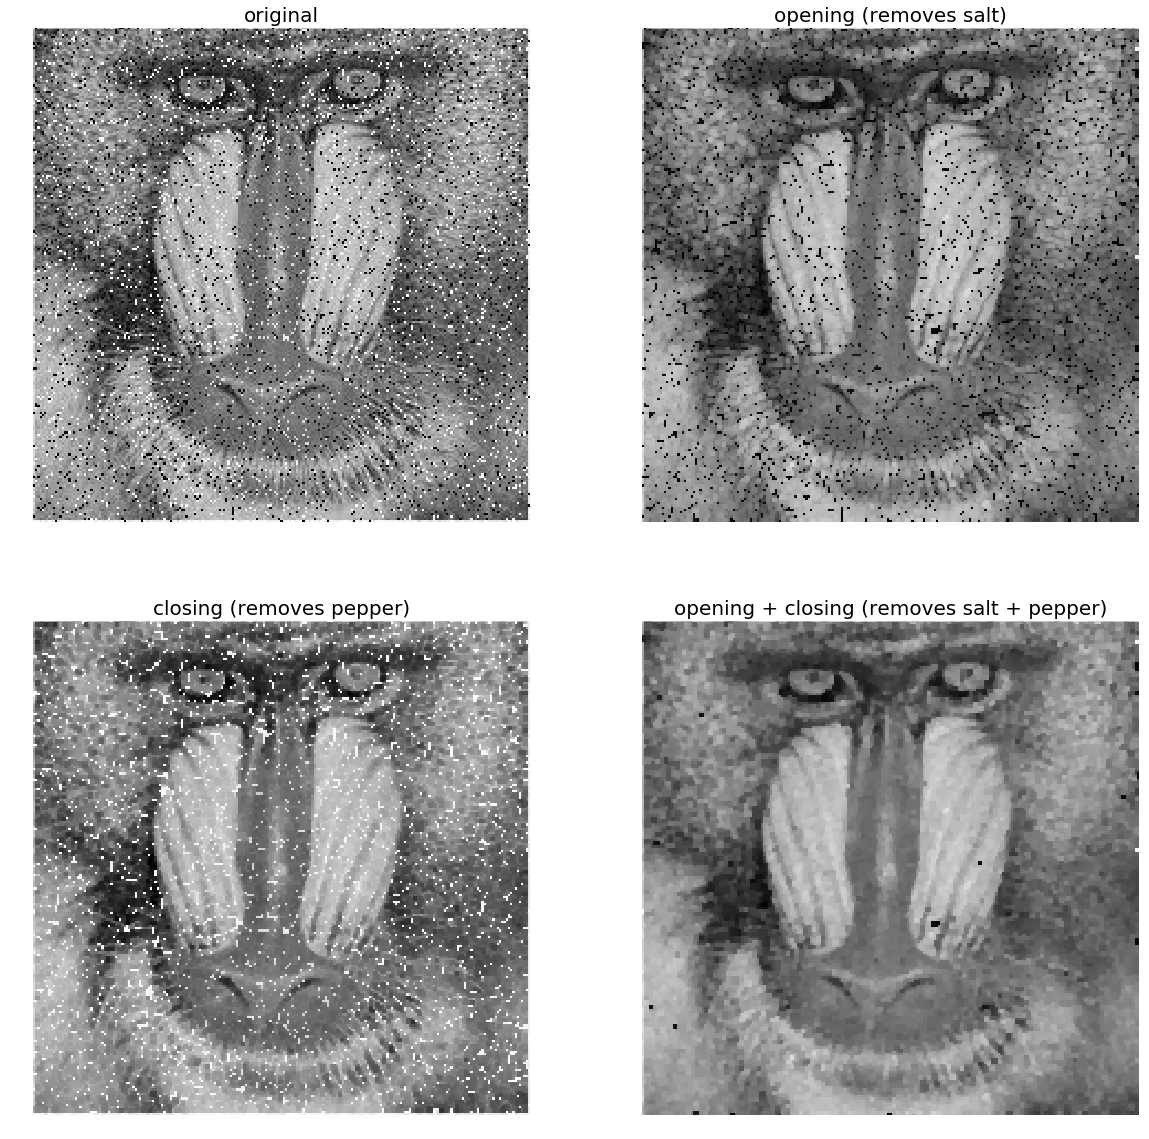

In [19]:
from scipy import ndimage
im = rgb2gray(imread('../images/mandrill_spnoise_0.1.jpg'))
im_o = ndimage.grey_opening(im, size=(2,2))
im_c = ndimage.grey_closing(im, size=(2,2))
im_oc = ndimage.grey_closing(ndimage.grey_opening(im, size=(2,2)), size=(2,2))
pylab.figure(figsize=(20,20))
pylab.subplot(221), pylab.imshow(im), pylab.title('original', size=20), pylab.axis('off')
pylab.subplot(222), pylab.imshow(im_o), pylab.title('opening (removes salt)', size=20), pylab.axis('off')
pylab.subplot(223), pylab.imshow(im_c), pylab.title('closing (removes pepper)', size=20),pylab.axis('off')
pylab.subplot(224), pylab.imshow(im_oc), pylab.title('opening + closing (removes salt + pepper)', size=20)
pylab.axis('off')
pylab.show()

### Computing the morphological Beucher gradient

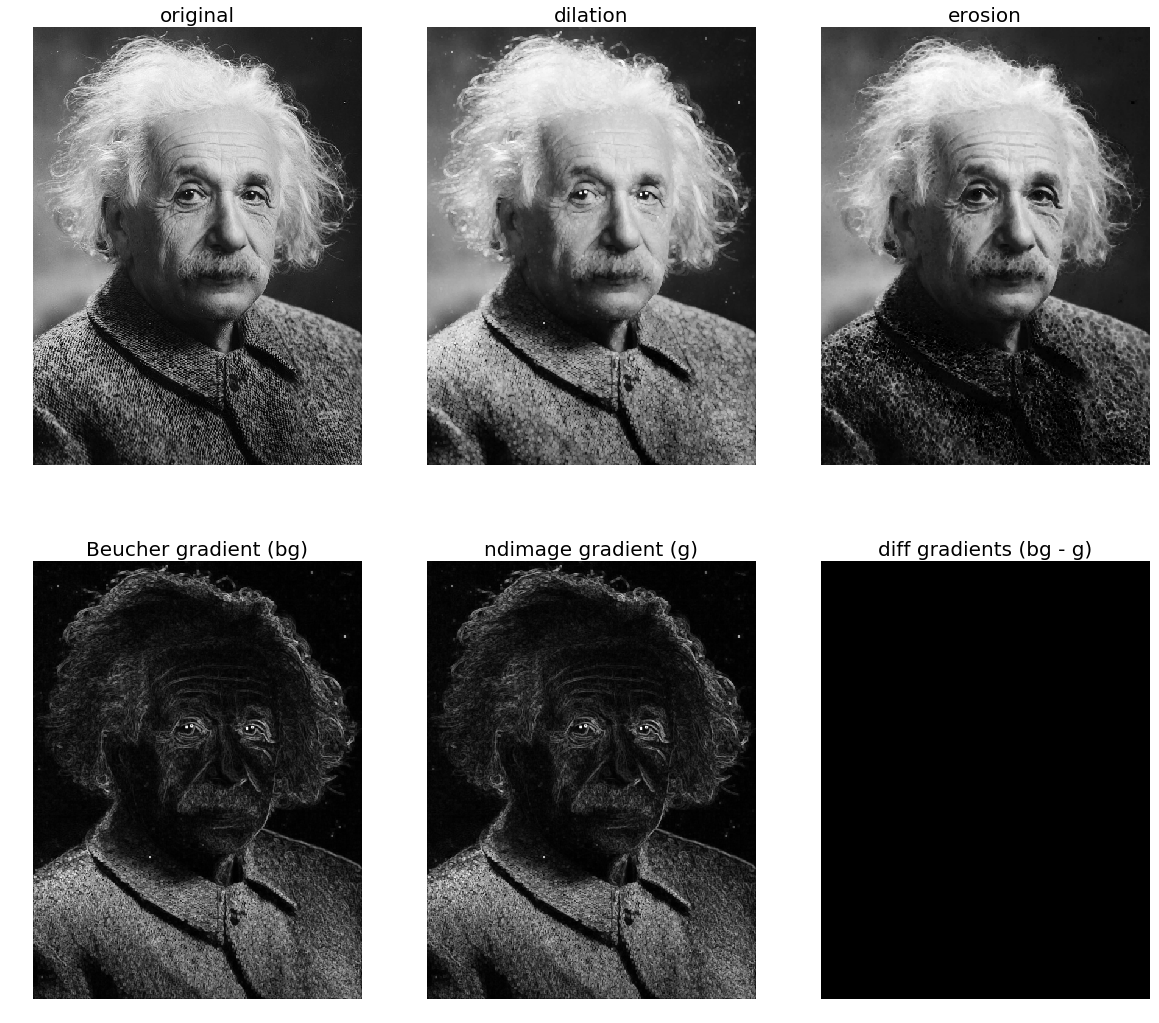

In [20]:
from scipy import ndimage
im = rgb2gray(imread('../images/einstein.jpg'))
im_d = ndimage.grey_dilation(im, size=(3,3))
im_e = ndimage.grey_erosion(im, size=(3,3))
im_bg = im_d - im_e
im_g = ndimage.morphological_gradient(im, size=(3,3))
pylab.gray()
pylab.figure(figsize=(20,18))
pylab.subplot(231), pylab.imshow(im), pylab.title('original', size=20),
pylab.axis('off')
pylab.subplot(232), pylab.imshow(im_d), pylab.title('dilation', size=20),
pylab.axis('off')
pylab.subplot(233), pylab.imshow(im_e), pylab.title('erosion', size=20),
pylab.axis('off')
pylab.subplot(234), pylab.imshow(im_bg), pylab.title('Beucher gradient (bg)', size=20), pylab.axis('off')
pylab.subplot(235), pylab.imshow(im_g), pylab.title('ndimage gradient (g)', size=20), pylab.axis('off')
pylab.subplot(236), pylab.title('diff gradients (bg - g)', size=20), pylab.imshow(im_bg - im_g) 
pylab.axis('off')
pylab.show()

### Computing the morphological Laplace

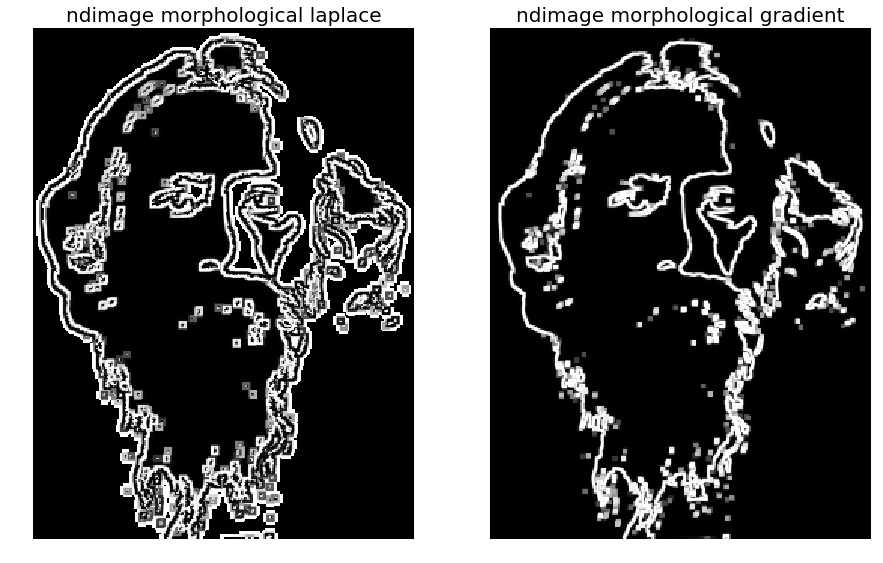

In [21]:
im = imread('../images/tagore.png')[...,3]
im_g = ndimage.morphological_gradient(im, size=(3,3))
im_l = ndimage.morphological_laplace(im, size=(5,5))
pylab.figure(figsize=(15,10))
pylab.subplot(121), pylab.title('ndimage morphological laplace', size=20), pylab.imshow(im_l)
pylab.axis('off')
pylab.subplot(122), pylab.title('ndimage morphological gradient', size=20),
pylab.imshow(im_g)
pylab.axis('off')
pylab.show()